# Predict Result

In [16]:
%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df_plays = pd.read_csv("../resources/plays.csv")

In [3]:
df_plays.head(5)

,_00,_01,_02,_10,_11,_12,_20,_21,_22,play,result
0,1,1,0,0,0,0,0,0,0,_01,WINNER
1,1,1,1,1,0,0,0,0,0,_02,WINNER
2,1,1,0,0,0,0,0,0,0,_01,LOSER
3,1,1,1,1,0,0,0,0,0,_02,LOSER
4,1,0,0,0,1,0,0,0,0,_00,LOSER


In [4]:
df_plays.describe()

,_00,_01,_02,_10,_11,_12,_20,_21,_22
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.500000,0.548780,0.304878,0.597561,0.609756,0.182927,0.073171,0.134146,0.268293
std,0.501531,0.499139,0.461766,0.491891,0.489299,0.387791,0.261214,0.341853,0.444428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cat_play = df_plays["play"].astype('category')
df_plays["play"] = cat_play.cat.codes
cat_play = cat_play.unique()
df_plays.describe()

,_00,_01,_02,_10,_11,_12,_20,_21,_22,play
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.500000,0.548780,0.304878,0.597561,0.609756,0.182927,0.073171,0.134146,0.268293,4.292683
std,0.501531,0.499139,0.461766,0.491891,0.489299,0.387791,0.261214,0.341853,0.444428,2.778037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [7]:
cat_result = df_plays["result"].astype('category')
df_plays["result"] = cat_result.cat.codes
cat_result = cat_result.unique()
df_plays.describe()

,_00,_01,_02,_10,_11,_12,_20,_21,_22,play,result
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.500000,0.548780,0.304878,0.597561,0.609756,0.182927,0.073171,0.134146,0.268293,4.292683,1.426829
std,0.501531,0.499139,0.461766,0.491891,0.489299,0.387791,0.261214,0.341853,0.444428,2.778037,0.586776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2.000000


In [13]:
X = df_plays.drop("result", axis=1)
Y = df_plays["result"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [19]:
parameters = {
    "class_weight": [None, "balanced"],
    "max_leaf_nodes": range(2, 21),
    "max_depth": [None] + list(range(1, 11))
}

decision_tree_clf = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree_clf, parameters)

clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

/Users/rdefarias/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rdefarias/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.29411764705882354

In [25]:
best_dtc = clf.best_estimator_

In [39]:
best_dtc.predict_proba([[1,0,1,0,1,0,0,0,0, x] for x in range(9)])

array([[0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176],
       [0.        , 0.47058824, 0.52941176]])

[Text(133.92000000000002, 181.2, 'X[5] <= 0.5\ngini = 0.537\nsamples = 147\nvalue = [6, 67, 74]'),
 Text(66.96000000000001, 108.72, 'gini = 0.498\nsamples = 119\nvalue = [0, 56, 63]'),
 Text(200.88000000000002, 108.72, 'X[6] <= 0.5\ngini = 0.645\nsamples = 28\nvalue = [6, 11, 11]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.598\nsamples = 25\nvalue = [3, 11, 11]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]')]

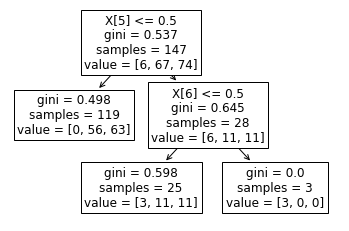

In [41]:
plot_tree(best_dtc, fontsize=12)